# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


# 1. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set). 

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [2]:
# CodeWrite 
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here

def kr(u,v,k_para,kernal):
    #evaluating different kernal functions given two vectors as inputs
    
    if kernal == 'linear':
        return u.T.dot(v)
    if kernal == 'poly':
        return (u.T.dot(v) + 1)**k_para
    if kernal == 'RBF':
        return np.exp(- k_para*(u-v).T.dot(u-v))
    
    
def get_alpha(Y_train,K,lam,eta):
    # inputs: training labels, Kernal matrix, regression parameter,learning rate
    # outputs: alpha_star,correponding loss incurred: Rnew
    # number of iterations for the gradient descent step are fixed to 100
    
    n = Y_train.shape[0] 
    I = np.ones((n,1))
    tol = 10**-10        # tolerance for stoping
    a = np.zeros((n,1))  # initialising the alpha_star
    GR = np.zeros((n,1)) # initialising the gradient
    y = np.diag(Y_train) #diagonalsing the label vector;to vectorise the summation operation  

    Rnew = np.inf        #initialising the risk values
    Rold = 0             #initialising the risk values
    itr = 0              # iteration counter
    
    while(abs(Rnew - Rold) >= tol):
        
        GR = (1/n)*((1/(1 + np.exp( y.dot((a.T.dot(K)).T)))).T.dot(-y.dot(K.T))).T + lam*K.dot(a)
        a = a - eta*GR
        Rold = Rnew
        Rnew = np.asscalar(((1/n)*(np.log( I + np.exp(-y.dot((a.T.dot(K)).T)))) + (lam/2)*(a.T.dot(K.dot(a)))).T.dot(I))
            
        itr = itr + 1            
        if itr == 100:   # fixing number of iterations to be eqaul to 100
            return Rnew,np.reshape(a,(a.shape[0],))
        
    return Rnew,np.reshape(a,(a.shape[0],))
    
        
def train_pred_logistic_regression(X_train, Y_train,kernal,lam, k_para,eta):
    r'''
    Arguments:
    X : (n,d) shape numpy array
    Y : (n,)  shape numpy array
    X_test : (m,d) shape numpy array
    kernel = 'linear' or 'rbf' or 'poly' 
    reg_param = $\lambda$
    num_iter_gd = number of GD iterations.

    Returns the result of kernel logistic regression :
    alpha: Vector of solutions for the dual. Numpy array of shape (n,)
    Rnew: the loss incurred in using the alpha

    Primal problem:
    $ \min_w  \sum_{i=1}^n \log(1+\exp(-y_i* \w^\top \phi(\x_i)))  + \frac{\lambda}{2} ||\w||^2 $

    the dual of which is

    $ \min_alpha \sum_{i=1}^n \log(1+\exp(-y_i* \alpha^\top K_{:,i} ))  + \frac{\lambda}{2} \alpha^\top K \alpha $
    where $\phi$ is the feature got by the kernel.

    Where K is the nxn kernel matrix computed on the training data.

    The kernel is defined by the kernel_param:
    If kernel=linear: K(\u,\v) = \u^\top \v  
    If kernel=poly:  K(\u,\v) = (1+\u^\top \v)^(kernel_param)
    If kernel=rbf:  K(\u,\v) = \exp(-kernel_param*||\u-\v||^2)
    '''
    n = Y_train.shape[0]
    K_mat = np.zeros((n,n))
    #evaluating the kernal matrix K
    for i in range(n):
        for j in range(n):
            K_mat[j,i] = kr( X_train[i,:], X_train[j,:], k_para, kernal )
            
    
    Rnew,a_star = get_alpha(Y_train ,K_mat ,lam, eta)
    
    return Rnew,a_star
    
def test_pred(a_star , X_train, Y_train, X_test, kernal, k_para):
    """
    Return the predictions on test_X using the learnt alphas
    """
    n = X_train.shape[0]
    Y_pred = np.zeros((X_test.shape[0]))
    
    for i in range(X_test.shape[0]):
        k_vec  = np.zeros((n,))
        for j in range(n):
            k_vec[j] = kr( X_test[i,:], X_train[j,:], k_para,kernal )
        
        eta = a_star.T.dot(k_vec)
        if eta >= 0:
            Y_pred[i] = +1
            
        if eta < 0:
            Y_pred[i] = -1
        
    return Y_pred



In [ ]:
###### CodeWrite : Use the functions above to do validation to get best hyperparameters 
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below.

A_star = np.zeros((4,3,2000))  #2000 is chosen because it is larger than any samples size
best_params = np.zeros((4,2,3))# (#datasets,#paramters(reg_param,keranal_para),#kernals)

from numpy import load


for det in range(4):
    if det == 0:
        data   = load('dataset_A.npz')
        dataset = 'dataset_A'
        etas = [1e-2,1e-5,1e-10]
        reg_params = [[1e-7,1e-5,1e-2,1e-1,0],[1e-11,1e-9,1e-7,1e-5,1e0],[1e-13,1e-11,1e-9,1e-7,1e-5]]
        K_params = [[0,0,0,0,0],[0,2,4,6,8],[6,8,10,12,14]]
        
    if det == 1:
        data = load('dataset_B.npz')
        dataset = 'dataset_B'
        etas = [1e-2,1e-5,1e-10]
        reg_params = [[1e-7,1e-5,1e-2,1e-1,0],[1e-11,1e-9,1e-7,1e-5,1e0],[1e-13,1e-11,1e-9,1e-7,1e-5]]
        K_params = [[0,0,0,0,0],[0,2,4,6,8],[6,8,10,12,14]]
        
        
    if det == 2:
        data = load('dataset_C.npz')
        dataset = 'dataset_C'
        etas = [1e-09,1e-09,1e-17]
        reg_params = [[1e-20,1e-18,1e-15,1e-11,1e-9],[1e-20,1e-18,1e-15,1e-12,1e-09],[1e-20,1e-18,1e-17,1e-15,1e-13]]
        K_params = [[0,0,0,0,0],[0,1,2,3,4],[0,1,2,3,4]]
        
        
    if det == 3:
        data = load('dataset_D.npz')
        dataset = 'dataset_D'
        etas = [1e-09,1e-09,1e-09]
        reg_params = [[1e-18,1e-15,1e-13,1e-11,0],[1e-18,1e-15,1e-12,1e-09,0],[1e-18,1e-17,1e-15,1e-13,1e-11]] 
        K_params = [[0,0,0,0,0],[0,1,2,3,4],[0,1,2,3,4]]
        
    #===============================================================================================================
    
    #------------Splitting the datasets into training and validation sets--------------------------
    
    X_tr   = data['arr_0']
    Y_tr   = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
         
    '''Validation set of size one-third of the X_tr set
        Training set of size two-thirds of the X_tr set'''
    div = 4
    n_val = X_tr.shape[0]//div 
    d = X_tr.shape[1]
    
    X_val  = np.zeros((n_val,d))
    Y_val  = np.zeros((n_val,))
    X_train = np.zeros((X_tr.shape[0] - n_val,d)) 
    Y_train = np.zeros((X_tr.shape[0] - n_val,))
    j=0
    k=0
    '''putting every third element of X_tr in X_val and the rest in X_train
       and Same goes for the Y_val and Y_train'''
    for i in range(1,X_tr.shape[0]):
    
        if i%div == 0:
            X_val[j,:] = X_tr[i,:]    
            Y_val[j]   = Y_tr[i]     
            j = j + 1
        else:
            X_train[k,:]  = X_tr[i,:]
            Y_train[k]    = Y_tr[i]
            k = k +1
    
    #===============================================================================================================
    
    Kernals = ['linear','poly','RBF']
    n = Y_train.shape[0]
    count = 0
    
    for kernal in Kernals:
        Acc_star = 0
        R_star = np.inf
        kp_star = K_params[0]
        lam_star = reg_params
        a_star = np.zeros((n,))
        
        for k_para in K_params[count]:
            for lam in reg_params[count]:
                    Rnew,a = train_pred_logistic_regression(X_train, Y_train,kernal,lam, k_para,etas[count])
                    Y_pred      = test_pred(a , X_train, Y_train, X_val, kernal, k_para)
                    Acc = len([i for i in range(X_val.shape[0]) if Y_pred[i] == Y_val[i]])/Y_val.shape[0]
                    if Acc_star < Acc:
                        Acc_star = Acc
                        kp_star  = k_para
                        lam_star = lam
                        R_star   = Rnew
                        a_star   = a
                    elif Acc_star == Acc:
                        if R_star > Rnew:
                            Acc_star = Acc
                            kp_star  = k_para
                            lam_star = lam
                            R_star = Rnew
                            a_star = a 
                        else:
                            pass
                        
              
            if kernal == 'linear':
                break         
                                  
        print(dataset)
        print('Accuracy_star = '+str(Acc_star)+'kernal = '+str(kernal)+ ' for lam_star = '+str(lam_star)+' for kp_star = '+str(kp_star))
        
        best_params[det,0,count] = kp_star
        best_params[det,1,count] = lam_star
        A_star[det,count,0:n]    = a_star
        count = count + 1
        
    # evaluating test zero one error   
    k = 0
    for kernal in Kernals:
        Y_pred = test_pred(A_star[det,k,0:n] , X_train, Y_train, X_test, kernal, best_params[det,0,k])
        Acc    = len([i for i in range(X_test.shape[0]) if Y_pred[i] != Y_test[i]])
        Y_pred2 = test_pred(A_star[det,k,0:n] , X_train, Y_train, X_train, kernal, best_params[det,0,k])
        Acc2    = len([i for i in range(X_train.shape[0]) if Y_pred2[i] != Y_train[i]])
        #print(' Test Accuracy is = '+str(Acc)+ ' for kernal = '+str(kernal)+'k_para = '+str(best_params[det,0,k])+' lam = '+str(best_params[det,1,k]))
        #print(' Train Accuracy is = '+str(Acc2)+ ' for kernal = '+str(kernal)+'k_para = '+str(best_params[det,0,k])+' lam = '+str(best_params[det,1,k]))
        k = k + 1 

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).

##### Number of iterations in the gradient descent step were limited to 100 , results were obtained subject to this constraint
##### Description of Datasets:

|Dataset||#Train samples||#Validation samples||#Test samples||
|-------||-------------||---------------||---------||
|Dataset_A|| 1125      ||  375 || 500||
|Dataset_B||1125       ||  375 || 500||
|Dataset_C||1125       || 375  ||297 ||
|Dataset_D|| 300       || 100  || 169 ||
  



### Zero - One Error
|      ||||        | Dataset_A |  |            ||||||      |       | Dataset_B       |          ||       
|------||||--------|-------|------|------------||||||----------|--------|------------|----------||
|Kernal||||Reg_para|K_para|Train(0-1)|Test(0-1)|||||| Reg_para | K_para | Train(0-1) | Test(0-1)|| 
|Linear|||| 0      |  -   |   147    |   74    ||||||  $10^{-2}$    |    -   | 192   |   100    ||          
|Poly  ||||$10^{-11}$| 4 |  157    |   86      ||||||  $10^{-11}$| 4    | 187        |  93      ||
|RBF   ||||$10^{-13}$| 14|   7     |   2       ||||||  $10^{-13}$| 8    | 189         |   98    ||



|      ||||        | Dataset_C|  |             ||||      |       | Dataset_D       |          ||       
|------||||--------|-------|------|------------||||----------|--------|------------|----------||
|Kernal||||Reg_para|K_para|Train(0-1)|Test(0-1)|||| Reg_para | K_para | Train(0-1) | Test(0-1)|| 
|Linear|||| $10^{-20}$|    |   234   |   61    ||||  $10^{-18}$   |    -   | 134       |   40    ||          
|Poly  ||||$10^{-20}$| 1.0 |   234   |   61      ||||  $10^{-18}$| 0   | 134          |  40     ||
|RBF   ||||$10^{-20}$| 1.0 |    0    |   19       ||||  $10^{-18}$| 1   | 134         |   40    ||
 
### Observations:
For Dataset_A, linear kernel does better, ever so slightly, than the poly kernel, both in training and testing. A variety of combination of kernal parameter and regression parameters were tried but still linear performed better than poly.  
For Dataset_B, Dataset_C and Dataset_D, poly performs better than linear.
For all the Datasets RBF out performs poly and linear kernel except for Dataset_D.  
In the case of Dataset_D all the kernels perform equally well,looking at the optimal values of the hyperparameter of poly and RBF for this dataset, it can be inferred that dataset is best seperated by a (d-1) dimesional hyperplane(though not completely seperable).


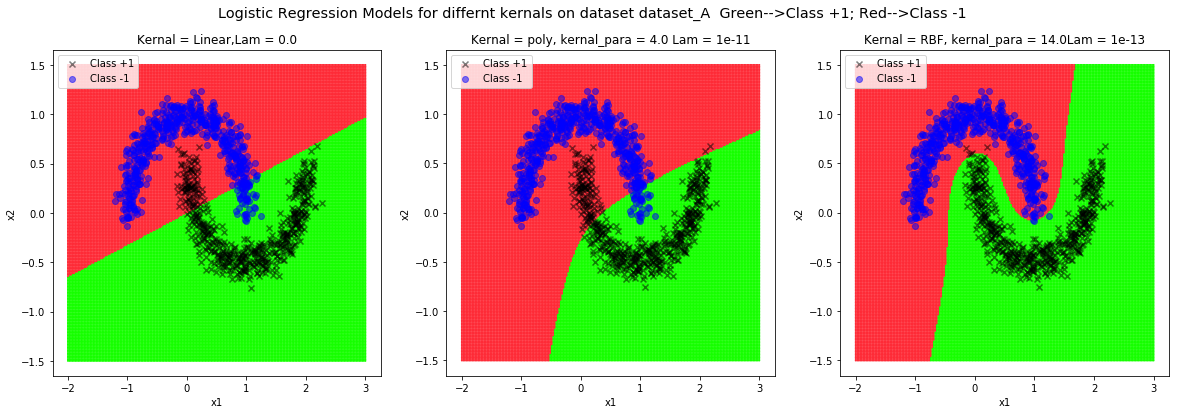

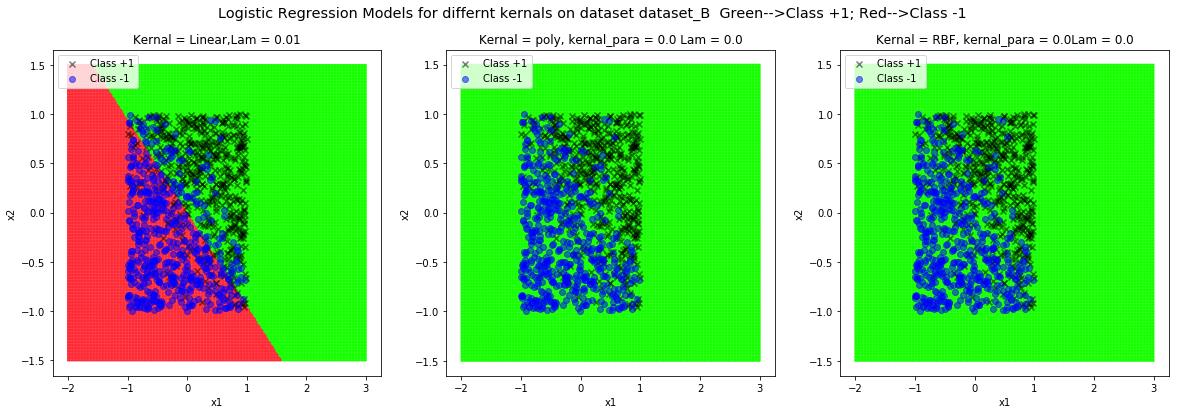

In [5]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6
from numpy import load
for det in range(2):
    if det == 0:
        data   = load('dataset_A.npz')
        dataset = 'dataset_A'
    if det == 1:
        data = load('dataset_B.npz')
        dataset = 'dataset_B'
        
        
    X_tr   = data['arr_0']
    Y_tr   = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    #===============================================================================================================
    
    #------------Splitting the datasets into training and validation sets--------------------------

    '''Validation set of size one-third of the X_tr set
        Training set of size two-thirds of the X_tr set'''
    div = 4
    n_val = X_tr.shape[0]//div 
    d = X_tr.shape[1]
    
    X_val  = np.zeros((n_val,d))
    Y_val  = np.zeros((n_val,))
    X_train = np.zeros((X_tr.shape[0] - n_val,d)) 
    Y_train = np.zeros((X_tr.shape[0] - n_val,))
    j=0
    k=0
    
    '''putting every third element of X_tr in X_val and the rest in X_train
       and Same goes for the Y_val and Y_train'''
    for i in range(1,X_tr.shape[0]):
    
        if i%div == 0:
            X_val[j,:] = X_tr[i,:]    
            Y_val[j]   = Y_tr[i]     
            j = j + 1
        else:
            X_train[k,:]  = X_tr[i,:]
            Y_train[k]    = Y_tr[i]
            k = k +1    
    #===============================================================================================================
    
  
  
    n = X_train.shape[0]
    nx1 = 200
    nx2 = 200
    x1list = np.linspace(-2,3, nx1)
    x2list = np.linspace(-1.5,1.5, nx2)
    X1,X2 = np.meshgrid(x1list, x2list) 
    X = np.concatenate((np.reshape(X1,(nx1*nx2,1)),np.reshape(X2,(nx1*nx2,1))),axis=1)
    
    Z1  = np.reshape(test_pred(A_star[det,0,0:n], X_train, Y_train, X,'linear', best_params[det,0,0]),(nx1,nx2))
    Z2  = np.reshape(test_pred(A_star[det,1,0:n], X_train, Y_train, X, 'poly', best_params[det,0,1]),(nx1,nx2))
    Z3  = np.reshape(test_pred(A_star[det,2,0:n], X_train, Y_train, X, 'RBF', best_params[det,0,2]),(nx1,nx2))
    
    Xp = X_train[Y_train == 1,:].T
    Xn = X_train[Y_train ==-1,:].T

    fig1 =plt.figure(figsize = (20,6))
    st = fig1.suptitle('Logistic Regression Models for differnt kernals on dataset '+str(dataset)+'  Green-->Class +1; Red-->Class -1',fontsize = 'x-large')

    ax1 = fig1.add_subplot(131)
    ax2 = fig1.add_subplot(132)
    ax3 = fig1.add_subplot(133)

    
    ax1.scatter(X1,X2,Z1>0,'#16ff00')
    ax1.scatter(X1,X2,Z1<0,'#fe2b37')
    ax1.scatter(Xp[0,:],Xp[1,:],marker ="x", color='k',label ='Class +1',alpha=0.5)
    ax1.scatter(Xn[0,:],Xn[1,:],marker ="o", color='b',label = 'Class -1',alpha =0.5)
    ax1.title.set_text("Kernal = Linear,Lam = "+str(best_params[det,1,0]))
    ax1.legend(loc ='upper left')
    
    
    ax2.scatter(X1,X2,Z2>0,'#16ff00')
    ax2.scatter(X1,X2,Z2<0,'#fe2b37')
    ax2.scatter(Xp[0,:],Xp[1,:],marker ="x", color='k',label ='Class +1',alpha=0.5)
    ax2.scatter(Xn[0,:],Xn[1,:],marker ="o", color='b',label = 'Class -1',alpha =0.5)
    ax2.title.set_text("Kernal = poly, kernal_para = "+str(best_params[det,0,1])+" Lam = "+str(best_params[det,1,1]))
    ax2.legend(loc='upper left')

    
    ax3.scatter(X1,X2,Z3>0,'#16ff00')
    ax3.scatter(X1,X2,Z3<0,'#fe2b37')
    ax3.scatter(Xp[0,:],Xp[1,:],marker ="x", color='k',label ='Class +1',alpha=0.5)
    ax3.scatter(Xn[0,:],Xn[1,:],marker ="o", color='b',label = 'Class -1',alpha =0.5)
    ax3.title.set_text("Kernal = RBF, kernal_para = "+str(best_params[det,0,2])+"Lam = "+str(best_params[det,1,2]))
    ax3.legend(loc ='upper left')
    
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    ax3.set_xlabel('x1')
    ax3.set_ylabel('x2')
    
    plt.show()


# 2. SVM

Write code for learning SVM below. Also write code for choosing best hyperparameters for each kernel type. You may use sklearn.svm for this purpose. (use a part of training set as validation set)

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [5]:
# CodeWrite cell
# Write SVM classifier using SKlearn
# write only functions here

def SVM_train(X_train,Y_train,kernal,reg_para,k_para):
    if kernal == 'linear':
        model = svm.SVC( kernel = kernal, C = reg_para)
        model.fit(X_train,Y_train)
    if kernal == 'poly':
        model = svm.SVC(kernel = kernal,C = reg_para, gamma=1,coef0= 1,degree = k_para)
        model.fit(X_train,Y_train)
    if kernal == 'RBF':
        model = svm.SVC(kernel ='rbf',C = reg_para, gamma = k_para)
        model.fit(X_train,Y_train)
        
    return model

def SVM_pred(model,X_test):
    
    return model.predict(X_test)



In [6]:
# CodeWrite cell
# Write code here for doing validation (for kernel_param and regularisation_param)
# on a subset of the training set. 
# Also for generating the numbers that you report below.

from numpy import load
best_params = np.zeros((4,2,3))# (#datasets,#paramters(reg_param,keranal_para),#kernals)
Models=[]
for det in range(4):
    if det == 0:
        data   = load('dataset_A.npz')
        dataset = 'dataset_A'
        #etas = [1e-2,1e-5,1e-10]
        reg_params = [[1e-7,1e-5,1e-2,1e-1],[1e-7,1e-5,1e0,1e1,1e2],[1e-2,1,2]]
        K_params = [[0],[0,2,4,6,8],[1,2,4,6,8]]
        
    if det == 1:
        data = load('dataset_B.npz')
        dataset = 'dataset_B'
        etas = [1e-2,1e-5,1e-10]
        reg_params = [[1e-5,1e-3,1e-2,1e-1,1e0],[1e-5,1e0,1e1,1e2,1e3],[1e-4,1e-3,1e-2,1,2]]
        K_params = [[0],[0,1,2,4],[2,4,6,8]]
        
    if det == 2:
        data = load('dataset_C.npz')
        dataset = 'dataset_C'
        etas = [1e-09,1e-09,1e-17]
        reg_params = [[1e-5,1e-4,1e-3,1e-2,1e-1,1e0],[1e-20,1e-18,1e-15,1e-12,1e-10],[1e-4,1e-3,1e-2,1,2,4]]
        K_params = [[0],[0,2,4,6,8,10],[1e-4,1e-3,1e-2,2,4,6,8]]
        
    if det == 3:
        data = load('dataset_D.npz')
        dataset = 'dataset_D'
        etas = [1e-09,1e-09,1e-09]
        reg_params = [[1e-18,1e-15,1e-13,1e-11],[1e-18,1e-15,1e-12,1e-09,0],[1e-18,1e-17,1e-15,1e-13,1e-11]] 
        K_params = [[0],[0,1,2,3,4],[0,1,2,3,4]]
        reg_params = [[1e-5,1e-4,1e-3,1e-2,1e-1,1e0],[1e-20,1e-18,1e-15,1e-12],[1e-4,1e-3,1e-2,1,2,4]]
        K_params = [[0],[0,2,4,6,8,10],[1e-4,1e-3,1e-2,2,4,6,8]]
        
        
    X_tr   = data['arr_0']
    Y_tr   = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    #===============================================================================================================
    
    #-------------------------Splitting the datasets into training and validation sets------------------------------

         
    # Validation set of size one-third of the X_tr set
    # Training set of size two-thirds of the X_tr set
    
    div = 4
    n_val = X_tr.shape[0]//div 
    d = X_tr.shape[1]
    
    X_val  = np.zeros((n_val,d))
    Y_val  = np.zeros((n_val,))
    X_train = np.zeros((X_tr.shape[0] - n_val,d)) 
    Y_train = np.zeros((X_tr.shape[0] - n_val,))
    j=0
    k=0
    
    # putting every third element of X_tr in X_val and the rest in X_train
    # and Same goes for the Y_val and Y_train
    
    for i in range(1,X_tr.shape[0]):
    
        if i%div == 0:
            X_val[j,:] = X_tr[i,:]    
            Y_val[j]   = Y_tr[i]     
            j = j + 1
        else:
            X_train[k,:]  = X_tr[i,:]
            Y_train[k]    = Y_tr[i]
            k = k +1    

    #===============================================================================================================
            
    Kernals = ['linear','poly','RBF']
    count = 0
    for kernal in Kernals:
        Acc_star = 0
        lam_star = 0
        kp_star = 0
        model_star = 0
        for reg_para in reg_params[count]:
            for k_para in K_params[count]:
                model = SVM_train(X_train,Y_train,kernal,reg_para,k_para)
                Y_pred = SVM_pred(model,X_val)
                Acc = len([i for i in range(X_val.shape[0]) if Y_pred[i]== Y_val[i]])/X_val.shape[0]
                if Acc_star < Acc:
                    Acc_star = Acc
                    kp_star = k_para
                    lam_star = reg_para
                    model_star = model
                else:
                    pass
                
        
        
        best_params[det,0,count] = kp_star
        best_params[det,1,count] = lam_star
        Models.append(model_star)
        count = count + 1
        
    #print('--------Validation Done-------------')
    for k in range(3,0,-1):
        
        Y_pred =SVM_pred(Models[-k],X_test)
        Acc    = len([i for i in range(X_test.shape[0]) if Y_pred[i] != Y_test[i]])#/Y_test.shape[0]
        #print('Test Accuracy is = '+str(Acc)+ ' for kernal = '+str(Kernals[-k])+'k_para = '+str(best_params[det,0,-k])+' lam = '+str(best_params[det,1,-k]))
        Y_pred2 = SVM_pred(Models[-k],X_train)
        Acc2    = len([i for i in range(X_train.shape[0]) if Y_pred2[i] != Y_train[i]])#/Y_test.shape[0]
        #print('Train Accuracy is = '+str(Acc2)+ ' for kernal = '+str(Kernals[-k])+'k_para = '+str(best_params[det,0,-k])+' lam = '+str(best_params[det,1,-k]))
        
    #print('-------------------------------------------------------------------------------------------------------------------')


TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  
#### Convention followed:
In sklearn following convention is used:  
Linear :  
k(x,y) = x$^T$y 

Poly:  
k(x,y) = ( r + $\gamma$x$^T$y)$^{d}$    
d: is specified by keyword 'degree'  
$\gamma$ = is specified by key word 'gamma'  
r: by coef0  
In the terminologies of the question these parameters take values:  
r = 1    
$\gamma$ = 1   
degree = k_para  

RBF:  
k(x,y) = exp(-$\gamma$||x-y||$^2$)  
$\gamma$ = is specified by key word 'gamma'  
In the terminologies of the question these parameters take values:    
$\gamma$ = k_para  

For all the three kernels, the value of C in the svm module is given by parameter reg_para.
##### Description of Datasets:

|Dataset||#Train samples||#Validation samples||#Test samples||
|-------||-------------||---------------||---------||
|Dataset_A|| 1125      ||  375 || 500||
|Dataset_B||1125       ||  375 || 500||
|Dataset_C||1125       || 375  ||297 ||
|Dataset_D|| 300       || 100  || 169 ||
  

### Zero - One Error
|      ||||        | Dataset_A |  |            ||||      |       | Dataset_B       |          ||       
|------||||--------|-------|------|------------||||----------|--------|------------|----------||
|Kernal||||Reg_para|K_para|Train(0-1)|Test(0-1)|||| Reg_para | K_para | Train(0-1) | Test(0-1)|| 
|Linear|||| 0.1    |  -   |   148    |   67    ||||  $10^{-2}$|    -  | 190        |    93    ||          
|Poly  ||||  1     | 4    |    0     |   2     ||||  1.0      | 2     | 193        |   105    ||
|RBF   ||||  1     | 1    |    2     |   2     ||||  $10^{-2}$| 6     | 190         |   95    ||



|      ||||        | Dataset_C|  |             ||||      |       | Dataset_D       |          ||       
|------||||--------|-------|------|------------||||----------|--------|------------|----------||
|Kernal||||Reg_para|K_para|Train(0-1)|Test(0-1)|||| Reg_para | K_para | Train(0-1) | Test(0-1)|| 
|Linear|||| $10^{-3}$|  - |   85     |   30    ||||  $10^{-4}$ |    - | 22         |    10    ||          
|Poly  ||||$10^{-20}$| 8  |   0      |    8    ||||  $10^{-20}$| 4    | 11         |    10    ||
|RBF   ||||   1 |$10^{-3}$|   0      |   7     ||||  4      |$10^{-4}$| 11         |    12    ||
 
### Observations:  
SVM seems to perform better than logistic regression for all the datasets.  
Poly kernels fits the Dataset_A completely (which was not the case with logistic regression).  
Accuracy of all three kernel is comparable in Dataset_B and Dataset_D, visualising the decision boundary in plot of Dataset_B can be used to infer that Dataset_d though present in higher dimensions is seperable by a hyperplane.  
For Dataset_C, poly as well as RBF kernel gives 0 training error and the test error is also low. This was not the case for the same kernels and same datasets for logistic regression.



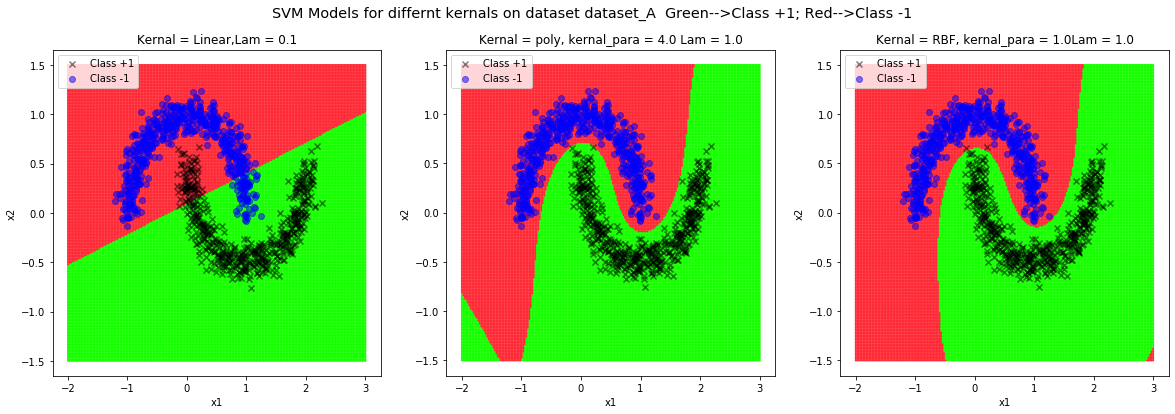

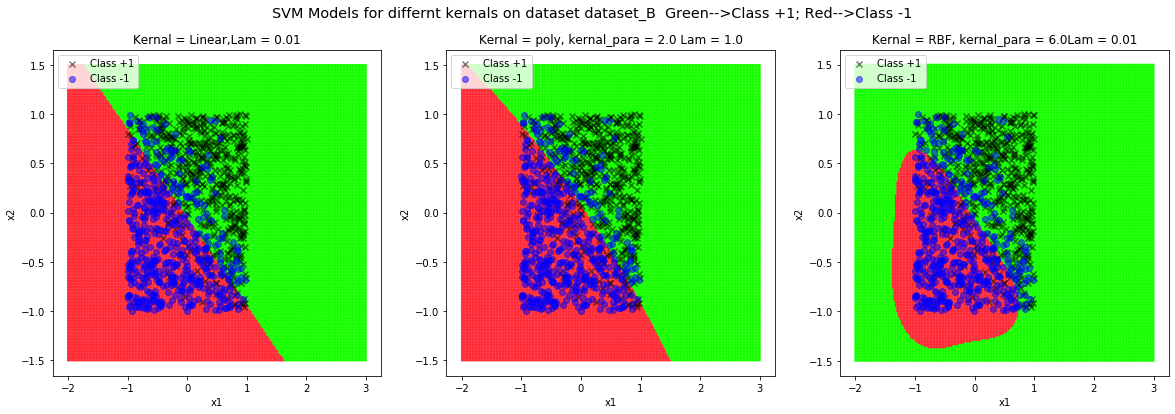

In [7]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6
from numpy import load
for det in range(2):
    if det == 0:
        data   = load('dataset_A.npz')
        dataset = 'dataset_A'
        alpha =  0 
    if det == 1:
        data = load('dataset_B.npz')
        dataset = 'dataset_B'
        alpha = 2
        
        
    X_tr   = data['arr_0']
    Y_tr   = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    #===============================================================================================================
    
    #------------Splitting the datasets into training and validation sets--------------------------

    '''Validation set of size one-third of the X_tr set
        Training set of size two-thirds of the X_tr set'''
    div = 4
    n_val = X_tr.shape[0]//div 
    d = X_tr.shape[1]
    
    X_val  = np.zeros((n_val,d))
    Y_val  = np.zeros((n_val,))
    X_train = np.zeros((X_tr.shape[0] - n_val,d)) 
    Y_train = np.zeros((X_tr.shape[0] - n_val,))
    j=0
    k=0
    
    '''putting every third element of X_tr in X_val and the rest in X_train
       and Same goes for the Y_val and Y_train'''
    for i in range(1,X_tr.shape[0]):
    
        if i%div == 0:
            X_val[j,:] = X_tr[i,:]    
            Y_val[j]   = Y_tr[i]     
            j = j + 1
        else:
            X_train[k,:]  = X_tr[i,:]
            Y_train[k]    = Y_tr[i]
            k = k +1    
    #===============================================================================================================
    
  
  
    n = X_train.shape[0]
    nx1 = 200
    nx2 = 200
    x1list = np.linspace(-2,3, nx1)
    x2list = np.linspace(-1.5,1.5, nx2)
    X1,X2 = np.meshgrid(x1list, x2list) 
    X = np.concatenate((np.reshape(X1,(nx1*nx2,1)),np.reshape(X2,(nx1*nx2,1))),axis=1)
    
    Z1  = np.reshape(SVM_pred(Models[alpha+det],X),(nx1,nx2))
    Z2  = np.reshape(SVM_pred(Models[alpha+det+1],X),(nx1,nx2))
    Z3  = np.reshape(SVM_pred(Models[alpha+det+2],X),(nx1,nx2))
    
    Xp = X_train[Y_train == 1,:].T
    Xn = X_train[Y_train ==-1,:].T

    fig1 =plt.figure(figsize = (20,6))
    st = fig1.suptitle('SVM Models for differnt kernals on dataset '+str(dataset)+'  Green-->Class +1; Red-->Class -1',fontsize = 'x-large')

    ax1 = fig1.add_subplot(131)
    ax2 = fig1.add_subplot(132)
    ax3 = fig1.add_subplot(133)


    ax1.scatter(X1,X2,Z1>0,'#16ff00')
    ax1.scatter(X1,X2,Z1<0,'#fe2b37')
    ax1.scatter(Xp[0,:],Xp[1,:],marker ="x", color='k',label ='Class +1',alpha=0.5)
    ax1.scatter(Xn[0,:],Xn[1,:],marker ="o", color='b',label = 'Class -1',alpha =0.5)
    ax1.title.set_text("Kernal = Linear,Lam = "+str(best_params[det,1,0]))
    ax1.legend(loc ='upper left')
  
    
    ax2.scatter(X1,X2,Z2>0,'#16ff00')
    ax2.scatter(X1,X2,Z2<0,'#fe2b37')
    ax2.scatter(Xp[0,:],Xp[1,:],marker ="x", color='k',label ='Class +1',alpha=0.5)
    ax2.scatter(Xn[0,:],Xn[1,:],marker ="o", color='b',label = 'Class -1',alpha =0.5)
    ax2.title.set_text("Kernal = poly, kernal_para = "+str(best_params[det,0,1])+" Lam = "+str(best_params[det,1,1]))
    ax2.legend(loc='upper left')

    
    ax3.scatter(X1,X2,Z3>0,'#16ff00')
    ax3.scatter(X1,X2,Z3<0,'#fe2b37')
    ax3.scatter(Xp[0,:],Xp[1,:],marker ="x", color='k',label ='Class +1',alpha=0.5)
    ax3.scatter(Xn[0,:],Xn[1,:],marker ="o", color='b',label = 'Class -1',alpha =0.5)
    ax3.title.set_text("Kernal = RBF, kernal_para = "+str(best_params[det,0,2])+"Lam = "+str(best_params[det,1,2]))
    ax3.legend(loc ='upper left')
    
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    ax3.set_xlabel('x1')
    ax3.set_ylabel('x2')
    
    plt.show()



# 3. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For synthetic data sets (dataset A and dataset B) report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [8]:
import random
# CodeWrite cell
# Write Decision tree classifier from scratch, 
# write only functions here (you may write extra functions here if you wish)

def best_split(Xp,Xn,pi,ni,sf,criterion):
    
    Xptr = Xp[pi==1,:] #positive data points
    Xntr = Xn[ni==1,:] #negative data points
    
    # max and min of the features  of Xptr,Xntr
    Xmax = np.amax(np.concatenate((np.array([np.amax(Xptr,axis=0)]) ,np.array([np.amax(Xntr,axis = 0)])),axis = 0), axis = 0) 
    Xmin = np.amin(np.concatenate((np.array([np.amin(Xptr,axis=0)]) ,np.array([ np.amin(Xntr,axis = 0)])),axis = 0), axis = 0)
   
    # indices of for the data that is currently availble for splitting
    indp = [i for i in range(pi.shape[0]) if pi[i] == 1]
    indn = [i for i in range(ni.shape[0]) if ni[i] == 1]
    
    # initialising the index matrices for further splitting of the data into left and right nodes 
    pil = np.zeros((pi.shape[0],))
    nil = np.zeros((ni.shape[0],))
    pir = np.zeros((pi.shape[0],))
    nir = np.zeros((ni.shape[0],))
    
    # intialising the thresholds for the current features
    thresh  = np.zeros((len(sf),Xp.shape[1]))
    
    
    # Finding the thresholds, each row of thresh corresponds to threshold for all the features for a given value in sf
    for i in range(len(sf)):
        thresh[i,:] = Xmin + (Xmax - Xmin)*sf[i]
    
    #print(thresh)
    
    
    feature    = 0    # feature for splitting
    thresh_val = 0    # threshold for the split
   
    
    if criterion == 'Accuracy':
        a1_star    = 0    # accuracy of the chosen positive split 
        a2_star    = 0    # accuracy of the chosen negative split
        
        for i in range(Xp.shape[1]):
            for j in range(len(sf)):
                a1 = (len([k for k in range(Xptr.shape[0]) if Xptr[k,i] >= thresh[j,i]]) + len([k for k in range(Xntr.shape[0]) if Xntr[k,i] < thresh[j,i]]))/(Xptr.shape[0] + Xntr.shape[0])                           
                a2 = 1 - a1
                if a1 > a1_star:
                    a1_star = a1
                    feature = i
                    thresh_val = thresh[j,i]
                if a2 > a2_star:
                    a2_star = a2
                    feature = i
                    thresh_val = thresh[j,i]
                    '''print('a1_star, a2_star, a1, a2 = '+str(a1_star) +str(a2_star) +str(a1) +str(a2))
                        print('thresh_val= ' +str(thresh[j,i]))'''
            
    elif criterion == 'Entropy':
        Entr = np.inf   # minimizing the entropy
        
        for i in range(Xp.shape[1]):
            for j in range(len(sf)):
                qL = len([k for k in range(Xptr.shape[0]) if Xptr[k,i] >= thresh[j,i]])/(Xptr.shape[0])
                pL = (len([k for k in range(Xptr.shape[0])if Xptr[k,i]>= thresh[j,i]])  + len([k for k in range(Xntr.shape[0]) if Xntr[k,i] >= thresh[j,i]]))/(Xptr.shape[0] + Xntr.shape[0])
                qR = len([k for k in range(Xptr.shape[0]) if Xptr[k,i] < thresh[j,i]])/(Xptr.shape[0])
                pR = (len([k for k in range(Xptr.shape[0])if Xptr[k,i] < thresh[j,i]])  + len([k for k in range(Xntr.shape[0]) if Xntr[k,i] < thresh[j,i]]))/(Xptr.shape[0] + Xntr.shape[0])
                
                #checking for the cases if ql=0,qr =0 or ql=1,qr=1.
                if qL != 1 and qL != 0:
                    aL = qL*np.log(1/qL) + (1-qL)*np.log(1/(1-qL))
                elif qL != 0 and qL == 1 :
                    aL = qL*np.log(1/qL)
                elif qL == 0 and qL != 1 :
                    aL = (1 - qL)*np.log(1/(1 - qL))
                elif qL == 0 and qL == 1:
                    aL = 0
                
                if qR != 1 and qR != 0:
                    aR = qR*np.log(1/qR) + (1-qR)*np.log(1/(1-qR))
                elif qR != 0 and qR == 1 :
                    aR = qR*np.log(1/qR)
                elif qR == 0 and qR != 1 :
                    aR = (1 - qR)*np.log(1/(1 - qR))
                elif qR == 0 and qR == 1:
                    aR = 0

                entr = pL * (aL)  + pR *(aR)    
                if Entr > entr :
                    Entr = entr
                    feature = i
                    thresh_val = thresh[j,i]
                    
    # splitting the data into child nodes              
    # assigning 1 to the index i of pil vector if the ith index of the positive data matrix belongs to left of the split
    # here p--> postive data point, i--> index, l-->left, r--> right, n--> negative.
    for i in indp:
        if Xp[i,feature] >= thresh_val:
            pil[i] = 1
        else:
            pir[i] = 1
                      
    for i in indn:
        if Xn[i,feature] >= thresh_val:
            nil[i] = 1
        else:
            nir[i] = 1
            
            
    return pil,pir,nil,nir,feature,thresh_val

def build_tree(parent,node_num,Xp,Xn,pi,ni,sf,stop,T,lis,criterion):
   
    # checking if the current node is pure
    if np.sum(ni)/(np.sum(ni) + np.sum(pi)) == 1 or np.sum(pi)/(np.sum(ni) + np.sum(pi)) == 1 :
        
        if np.sum(ni)/(np.sum(ni) + np.sum(pi)) > np.sum(pi)/(np.sum(ni) + np.sum(pi)):
            T.append(([node_num,parent,None,None],None,None,-1))
            return
        
        elif np.sum(ni)/(np.sum(ni) + np.sum(pi)) < np.sum(pi)/(np.sum(ni) + np.sum(pi)):
            T.append(([node_num,parent,None,None],None,None,+1))
            return
        
        else:
            T.append(([node_num,parent,None,None],None,None,random.choice([-1,1])))
            return
                     
    # checking if current node has reached at minimum number of points
    elif np.sum(pi) + np.sum(ni) <= stop:
        
        if np.sum(pi) == np.sum(ni):
            T.append(([node_num,parent,None,None],None,None,random.choice([-1,1])))
            return
        elif np.sum(pi) > np.sum(ni):
            T.append(([node_num,parent,None,None],None,None,1))
            return
        else:
            T.append(([node_num,parent,None,None],None,None,-1))
            return          

    # splitting the data further if above two criterion fail
    else:
        pil,pir,nil,nir,feature,thresh_val = best_split(Xp,Xn,pi,ni,sf,criterion) 
        
        lis.append(lis[-1]+1)
        lis.append(lis[-1]+1)
        lchild = lis[-2]
        rchild = lis[-1]
        T.append(([node_num,parent,lis[-2],lis[-1]],feature,thresh_val,None)) #add the current node           
        build_tree(node_num,lchild,Xp,Xn,pil,nil,sf,stop,T,lis,criterion) #left child
        build_tree(node_num,rchild,Xp,Xn,pir,nir,sf,stop,T,lis,criterion) #right child
        # note that numbering of the nodes is not same as done in most binary tree(numbering all the nodes at same level left
        # to right before proceeding to next level); but order of numbering the nodes is not of concern to us.  
        return 

def train_decision_tree(X, Y, num_nodes_stop,criterion,sf):
    r""" Returns a decision tree trained on X and Y. 
        Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
        Split criterion can be either 'accuracy' or 'entropy'.
        Returns a tree (In whatever format that you find appropriate)
    """
    Xp = X[Y == 1,:]
    Xn = X[Y == -1,:]
    pi = np.ones((Xp.shape[0],)) # array for tracking access of positive sample to different nodes
    ni = np.ones((Xn.shape[0],)) # array for tracking access of negative sample to different nodes
    Tree = []      
    lis  = [1]                   # list of node numbers assigned; will be updated as and when nodes are added 
    
    build_tree(None,1,Xp,Xn,pi,ni,sf,num_nodes_stop,Tree,lis,criterion)
    
    return Tree

def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    
    # The tree is represented as list of nodes with each node having the following representation
    # Node is stored as a tuple and looks like as follows :
    # ([node_number,parent,child_left,child_right],feature_to_split,correponding_threshold,class +1 or -1 or None)
    
    Y_pred  = np.zeros((test_X.shape[0],))
    for i in range(test_X.shape[0]):
        k = 0 
        #while the node is not leaf 
        while (tree[k][3] == None):
            #checking if the data point is to go left or right based on the threshold 
            
            if test_X[i,tree[k][1]] >= tree[k][2] :
                k = k + 1       
                # if the data point is to go to the left subtree/leaf then go to the next tuple in this list of tuples
            else:
                ind = [j for j in range(len(tree)) if tree[j][0][0] == tree[k][0][3]]
                k = ind[0]
                #if the data point is to go to the right then find the tuple whose node_num is equal to the right child of the current node
            
        Y_pred[i] = tree[k][3]
        #return the class of the leaf that you happen to boil down to

    return Y_pred







In [9]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below. 
# Repeat with criterion set to entropy also.

from numpy import load
# saving all the decision trees(in 'Trees' list) and the correponding node stops(in 'nstops' list)
Trees = []
nstops = []
for det in range(4):
    if det == 0:
        data   = load('dataset_A.npz')
        dataset = 'dataset_A'
        sf  = [[i/10 for i in range(1,10)], [1/3,2/3]]
        #sf is the number of divisions of current visible input space (to generate the thresholds)
        criteria = ['Accuracy','Entropy']
        b = 2
        
    if det == 1:
        data = load('dataset_B.npz')
        dataset = 'dataset_B'
        sf  = [[i/10 for i in range(1,10)], [1/3,2/3]]
        #sf is the number of divisions of current visible input space (to generate the thresholds)
        criteria = ['Accuracy','Entropy']
        b = 2
        
    if det == 2:
        data = load('dataset_C.npz')
        dataset = 'dataset_C'
        sf  = [[i/10 for i in range(1,10)], [1/3,2/3]]
        #sf is the number of divisions of current visible input space (to generate the thresholds)
        criteria = ['Accuracy']
        b = 1
        
    if det == 3:
        data = load('dataset_D.npz')
        dataset = 'dataset_D'
        sf = [[1/2],[1/3,2/3]]    
        #sf is the number of divisions of current visible input space (to generate the thresholds)
        criteria = ['Accuracy','Entropy']
        b = 2
    #===============================================================================================================
    
    #----------------------Splitting the dataset into training and validation sets---------------------------------

    #forming the training and validation sets
        
    X_tr   = data['arr_0']
    Y_tr   = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    
         
    '''Validation set of size one-third of the X_tr set
        Training set of size two-thirds of the X_tr set'''
    div = 4
    n_val = X_tr.shape[0]//div 
    d = X_tr.shape[1]
    
    X_val  = np.zeros((n_val,d))
    Y_val  = np.zeros((n_val,))
    X_train = np.zeros((X_tr.shape[0] - n_val,d)) 
    Y_train = np.zeros((X_tr.shape[0] - n_val,))
    j=0
    k=0
    
    '''putting every third element of X_tr in X_val and the rest in X_train
       and Same goes for the Y_val and Y_train'''
    
    for i in range(1,X_tr.shape[0]):
    
        if i%div == 0:
            X_val[j,:] = X_tr[i,:]    
            Y_val[j]   = Y_tr[i]     
            j = j + 1
        else:
            X_train[k,:]  = X_tr[i,:]
            Y_train[k]    = Y_tr[i]
            k = k +1    
            
    #===============================================================================================================
    
    

    #generating differnt node stop criteria(1,2,4,...#sample//10)
    S = [2**i for i in range(15) if 2**i < X_train.shape[0]//10]
    S.append(X_train.shape[0]//10)
    count = 0
    
    for criterion in criteria:
        Acc_star = 0 
        nstop = 0
        T_star = 0
        for i in range(len(S)):
            T = train_decision_tree(X_train,Y_train,S[i],criterion,sf[count])
            Y_pred = eval_decision_tree(T,X_val)
            Acc = len([i for i in range(Y_val.shape[0]) if Y_pred[i] == Y_val[i]])/Y_val.shape[0]
            if Acc_star < Acc:
                Acc_star = Acc
                nstop  = S[i]
                T_star = T
        Trees.append(T_star)
        nstops.append(nstop)
        #print('Acc on val for nstop = ' +str(S[i])+ ' is = '+str(Acc)+ ' and Acc_star on val  is = ' +str(Acc_star)+ 'for nstop = ' +str(nstop)+'for dataset = ' +str(dataset))
        count = count + 1
        
    #print('--Validation Done---------')
    
    for k in range(b,0,-1):
        Y_pred_1 = eval_decision_tree(Trees[-k],X_train) #picks the last but one and last tree from the list Trees
        Y_pred_2 = eval_decision_tree(Trees[-k],X_test)
        Error_1 = len([i for i in range(X_train.shape[0]) if Y_pred_1[i]!= Y_train[i]])
        Error_2 = len([i for i in range(Y_test.shape[0]) if Y_pred_2[i] != Y_test[i]])
        
        #print(' Train Error(0-1) for dataset = ' +str(dataset)+ ' is  = ' + str(Error_1)+ ' for criterion = '+str(criteria[-k])+ ' and nstops = '+str(nstops[-k]))   
        #print(' Test Error(0-1) for dataset = ' +str(dataset)+ ' is  = ' + str(Error_2)+ ' for criterion = '+str(criteria[-k])+ ' and nstops = '+str(nstops[-k]))
    #print('------------------------------------------------------------------------------------------------')
 
    
    

Acc on val for nstop = 112 is = 0.8426666666666667 and Acc_star on val  is = 0.88for nstop = 1for dataset = dataset_A
Acc on val for nstop = 112 is = 0.864 and Acc_star on val  is = 0.96for nstop = 1for dataset = dataset_A
Acc on val for nstop = 112 is = 0.6986666666666667 and Acc_star on val  is = 0.752for nstop = 8for dataset = dataset_B
Acc on val for nstop = 112 is = 0.8133333333333334 and Acc_star on val  is = 0.8133333333333334for nstop = 112for dataset = dataset_B
Acc on val for nstop = 112 is = 0.8293333333333334 and Acc_star on val  is = 0.904for nstop = 4for dataset = dataset_C
Acc on val for nstop = 30 is = 0.9 and Acc_star on val  is = 0.9for nstop = 8for dataset = dataset_D
Acc on val for nstop = 30 is = 0.87 and Acc_star on val  is = 0.89for nstop = 8for dataset = dataset_D


TextWrite cell:  

Note: In the case of Dataset_C and entropy as a criterion, the notebooks always crashed while running the algorithm. So, for this dataset results correponding to Accuracy are only presented.  
##### Description of Datasets:

|Dataset||#Train samples||#Validation samples||#Test samples||
|-------||-------------||---------------||---------||
|Dataset_A|| 1125      ||  375 || 500||
|Dataset_B||1125       ||  375 || 500||
|Dataset_C||1125       || 375  ||297 ||
|Dataset_D|| 300       || 100  || 169 ||
    
  
  
#### Results :
  
|Dataset  |Criteria| #nodes_stop |Train(0-1)|Test(0-1)|
|---------|--------|-------------|----------|---------|
|Dataset_A|Accuracy|     1       |   0      | 72      |   
|Dataset_A|Entropy |     1       |   0      | 18      |
|         |        |             |          |         |  
|Dataset_B|Accuracy|     8       |   197    | 140     |
|Dataset_B|Entropy |    112      |   213    | 101     |
|         |        |             |          |         |
|Dataset_C|Accuracy|     1       |    0     |  42     |
|         |        |             |          |         |
|Dataset_D|Accuracy|     8       |    15    |  9      |
|Dataset_D|Entropy |     16      |     21   |    14   |
|         |        |             |          |         |


### Observations:  
In general Entropy critericon seems to give better test accuracy.
For the case of Dataset_A, both the criterion splitted the data until it was pure but test error of Entropy criterion is one-fourth of the test error of Accuracy criterion, implying that not always are the splits corresponding to both the criterion the same.  
Dataset_b has the highest percecntage error of all the datasets, a significant fraction of data points correponding each class are with the other, making it nearly impossible to seperate them.  
Decision tree performs, on an average over all datasets, better than logistic regression and comparable with SVMs. 



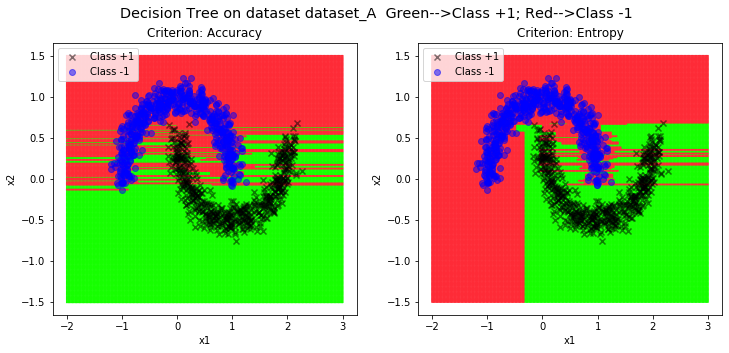

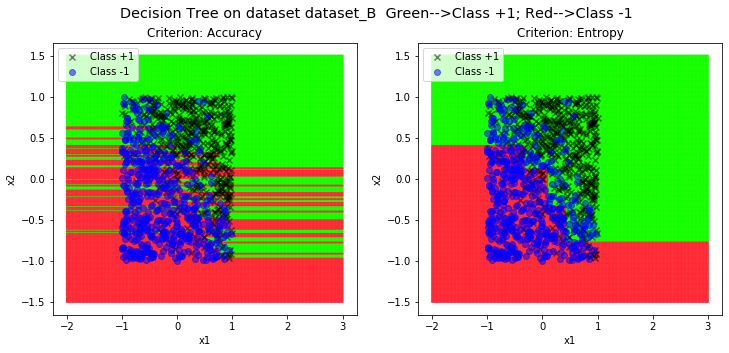

In [10]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

from numpy import load
for det in range(2):
    if det == 0:
        data   = load('dataset_A.npz')
        dataset = 'dataset_A'
        alpha = 0
        
    if det == 1:
        data = load('dataset_B.npz')
        dataset = 'dataset_B'
        alpha = 1
        
    X_tr   = data['arr_0']
    Y_tr   = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
         
    '''Validation set of size one-third of the X_tr set
        Training set of size two-thirds of the X_tr set'''
    div = 4
    n_val = X_tr.shape[0]//div 
    d = X_tr.shape[1]
    
    X_val  = np.zeros((n_val,d))
    Y_val  = np.zeros((n_val,))
    X_train = np.zeros((X_tr.shape[0] - n_val,d)) 
    Y_train = np.zeros((X_tr.shape[0] - n_val,))
    j=0
    k=0
    
    '''putting every third element of X_tr in X_val and the rest in X_train
       and Same goes for the Y_val and Y_train'''
    for i in range(1,X_tr.shape[0]):
    
        if i%div == 0:
            X_val[j,:] = X_tr[i,:]    
            Y_val[j]   = Y_tr[i]     
            j = j + 1
        else:
            X_train[k,:]  = X_tr[i,:]
            Y_train[k]    = Y_tr[i]
            k = k +1    
    
  
    n = X_train.shape[0]
    nx1 = 200
    nx2 = 200
    x1list = np.linspace(-2,3, nx1)
    x2list = np.linspace(-1.5,1.5, nx2)
    X1,X2 = np.meshgrid(x1list, x2list) 
    X = np.concatenate((np.reshape(X1,(nx1*nx2,1)),np.reshape(X2,(nx1*nx2,1))),axis=1)
 
    Z1  = np.reshape(eval_decision_tree(Trees[det+alpha],X),(nx1,nx2))
    Z2  = np.reshape(eval_decision_tree(Trees[det+alpha+1],X),(nx1,nx2))
    
    Xp = X_train[Y_train == 1,:].T 
    Xn = X_train[Y_train ==-1,:].T

    fig1 =plt.figure(figsize = (12,5))
    st = fig1.suptitle('Decision Tree on dataset '+str(dataset)+'  Green-->Class +1; Red-->Class -1',fontsize = 'x-large')

    ax1 = fig1.add_subplot(121)
    ax2 = fig1.add_subplot(122)
    

    ax1.scatter(X1,X2,Z1>0,'#16ff00')
    ax1.scatter(X1,X2,Z1<0,'#fe2b37')
    ax1.scatter(Xp[0,:],Xp[1,:],marker ="x", color='k',label ='Class +1',alpha=0.5)
    ax1.scatter(Xn[0,:],Xn[1,:],marker ="o", color='b',label = 'Class -1',alpha =0.5)
    ax1.title.set_text("Criterion: Accuracy")
    ax1.legend(loc ='upper left')
    
    ax2.scatter(X1,X2,Z2>0,'#16ff00')
    ax2.scatter(X1,X2,Z2<0,'#fe2b37')
    ax2.scatter(Xp[0,:],Xp[1,:],marker ="x", color='k',label ='Class +1',alpha=0.5)
    ax2.scatter(Xn[0,:],Xn[1,:],marker ="o", color='b',label = 'Class -1',alpha =0.5)
    ax2.title.set_text("Criterion: Entropy")
    ax2.legend(loc ='upper left')

    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    



# 4 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [11]:
# CodeWrite cell
# Write Random Forest classifier. 
import random
def best_split(Xp,Xn,pi,ni,sf,criterion,b):
    
    Xptr = Xp[pi==1,:] #positive data points
    Xntr = Xn[ni==1,:] #negative data points
    
    # max and min of the features  of Xptr,Xntr
    Xmax = np.amax(np.concatenate((np.array([np.amax(Xptr,axis=0)]) ,np.array([np.amax(Xntr,axis = 0)])),axis = 0), axis = 0) 
    Xmin = np.amin(np.concatenate((np.array([np.amin(Xptr,axis=0)]) ,np.array([ np.amin(Xntr,axis = 0)])),axis = 0), axis = 0)
    #print(Xmax)
    #print(Xmin)
    # indices of for the data that is currently availble for splitting
    indp = [i for i in range(pi.shape[0]) if pi[i] == 1]
    indn = [i for i in range(ni.shape[0]) if ni[i] == 1]
    
    # initialising the index matrices for further splitting
    pil = np.zeros((pi.shape[0],))
    nil = np.zeros((ni.shape[0],))
    pir = np.zeros((pi.shape[0],))
    nir = np.zeros((ni.shape[0],))
    
    nfeatures = int(b*Xp.shape[1])
    fs = [i for i in range(Xp.shape[1])]
    f_indices = random.choices(fs ,k = nfeatures)
    
    # intialising the thresholds for the current features
    thresh  = np.zeros((len(sf),nfeatures))
    
    
    # Finding the thresholds, each row of thresh corresponds to threshold for the randomly selected features
    # for a given value in sf
    k = 0
    for j in f_indices:
        for i in range(len(sf)):
            thresh[i,k] = Xmin[j] + (Xmax[j] - Xmin[j])*sf[i]
        k=k+1
    
    
    
    
    feature    = 0    # feature for splitting
    thresh_val = 0    # threshold for the split
   
    
    if criterion == 'Accuracy':
        a1_star    = 0    # accuracy of the chosen positive split 
        a2_star    = 0    # accuracy of the chosen negative split
        for i in range((nfeatures)):
            for j in range(len(sf)):
                a1 = (len([k for k in range(Xptr.shape[0]) if Xptr[k,f_indices[i]] >= thresh[j,i]]) + len([k for k in range(Xntr.shape[0]) if Xntr[k,f_indices[i]] < thresh[j,i]]))/(Xptr.shape[0] + Xntr.shape[0])                           
                a2 = 1 - a1
                if a1 > a1_star:
                    a1_star = a1
                    feature = i
                    thresh_val = thresh[j,i]
                if a2 > a2_star:
                    a2_star = a2
                    feature = i
                    thresh_val = thresh[j,i]
                    
    elif criterion == 'Entropy':
        Entr = np.inf #minimizing the entropy
        for i in range(nfeatures):
            for j in range(len(sf)):
                qL = len([k for k in range(Xptr.shape[0]) if Xptr[k,f_indices[i]] >= thresh[j,i]])/(Xptr.shape[0])
                pL = (len([k for k in range(Xptr.shape[0])if Xptr[k,f_indices[i]]>= thresh[j,i]])  + len([k for k in range(Xntr.shape[0]) if Xntr[k,f_indices[i]] >= thresh[j,i]]))/(Xptr.shape[0] + Xntr.shape[0])
                qR = len([k for k in range(Xptr.shape[0]) if Xptr[k,f_indices[i]] < thresh[j,i]])/(Xptr.shape[0])
                pR = (len([k for k in range(Xptr.shape[0])if Xptr[k,f_indices[i]] < thresh[j,i]])  + len([k for k in range(Xntr.shape[0]) if Xntr[k,f_indices[i]] < thresh[j,i]]))/(Xptr.shape[0] + Xntr.shape[0])
               
                if qL != 1 and qL != 0:
                    aL = qL*np.log(1/qL) + (1-qL)*np.log(1/(1-qL))
                elif qL != 0 and qL == 1 :
                    aL = qL*np.log(1/qL)
                elif qL == 0 and qL != 1 :
                    aL = (1 - qL)*np.log(1/(1 - qL))
                elif qL == 0 and qL == 1:
                    aL = 0
                
                if qR != 1 and qR != 0:
                    aR = qR*np.log(1/qR) + (1-qR)*np.log(1/(1-qR))
                elif qR != 0 and qR == 1 :
                    aR = qR*np.log(1/qR)
                elif qR == 0 and qR != 1 :
                    aR = (1 - qR)*np.log(1/(1 - qR))
                elif qR == 0 and qR == 1:
                    aR = 0

                entr = pL * (aL)  + pR *(aR)    
                if Entr > entr :
                    Entr = entr
                    feature = i
                    thresh_val = thresh[j,i]
                    
    # assigning 1 to the index i of pil vector if the ith index of the positive data matrix belongs to left of the split
    # here p--> postive data point, i--> index, l-->left, r--> right, n--> negative.
    for i in indp:
        if Xp[i,f_indices[feature]] >= thresh_val:
            pil[i] = 1
        else:
            pir[i] = 1
                
                
    for i in indn:
        if Xn[i,f_indices[feature]] >= thresh_val:
            nil[i] = 1
        else:
            nir[i] = 1
    return pil,pir,nil,nir,f_indices[feature],thresh_val

def build_tree(parent,node_num,Xp,Xn,pi,ni,sf,stop,T,lis,criterion,b):

    # print('node,parent')
    # print(node_num,parent)
    # print(pi,ni)
    # checking if the current node is pure
    if np.sum(ni)/(np.sum(ni) + np.sum(pi)) == 1 or np.sum(pi)/(np.sum(ni) + np.sum(pi)) == 1 :
        #print('terminated coz of purity at node = ' +str(node_num))
        if np.sum(ni)/(np.sum(ni) + np.sum(pi)) > np.sum(pi)/(np.sum(ni) + np.sum(pi)):
            T.append(([node_num,parent,None,None],None,None,-1))
            return
        
        elif np.sum(ni)/(np.sum(ni) + np.sum(pi)) < np.sum(pi)/(np.sum(ni) + np.sum(pi)):
            T.append(([node_num,parent,None,None],None,None,+1))
            return
        
        else:
            T.append(([node_num,parent,None,None],None,None,random.choice([-1,1])))
            return
                     
    # checking if the node has reached at min number of points
    elif np.sum(pi) + np.sum(ni) <= stop:
        #print('terminated coz of stop at node = '+str(node_num))
        if np.sum(pi) == np.sum(ni):
            T.append(([node_num,parent,None,None],None,None,random.choice([-1,1])))
            return
        elif np.sum(pi) > np.sum(ni):
            T.append(([node_num,parent,None,None],None,None,1))
            return
        else:
            T.append(([node_num,parent,None,None],None,None,-1))
            return          

    # splitting the data further if above two criterion fails 
    else:
        pil,pir,nil,nir,feature,thresh_val = best_split(Xp,Xn,pi,ni,sf,criterion,b) 
        lis.append(lis[-1]+1)
        lis.append(lis[-1]+1)
        lchild = lis[-2]
        rchild = lis[-1]
        T.append(([node_num,parent,lis[-2],lis[-1]],feature,thresh_val,None))  
        
        #parent = node_num             
        build_tree(node_num,lchild,Xp,Xn,pil,nil,sf,stop,T,lis,criterion,b)
        build_tree(node_num,rchild,Xp,Xn,pir,nir,sf,stop,T,lis,criterion,b)
        return 
                     



def train_decision_tree(Xp, Xn,pi,ni, num_nodes_stop,criterion,sf,b):
    
    Tree = []      
    lis  = [1]
    build_tree(None,1,Xp,Xn,pi,ni,sf,num_nodes_stop,Tree,lis,criterion,b)
    
    return Tree

def train_random_forest(X, Y, num_trees, num_nodes_stop,criterion, a, b,sf):
    """ Returns a random forest trained on X and Y. 
        Trains num_trees.
        Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
        Split criterion can be either 'accuracy' or 'entropy'.
        Fraction of data used per tree = a
        Fraction of features used in each node = b
        Returns a random forest (In whatever format that you find appropriate)
    """
    Xpos = X[Y == 1,:]
    Xneg = X[Y ==-1,:]
    forest = []
    for i in range(num_trees):
        
        #Randomly choose half of the data points
        
        Xp = np.array(random.choices(Xpos,k=int(a*Xpos.shape[0])))
        Xn = np.array(random.choices(Xneg,k=int(a*Xneg.shape[0])))
    
        pi = np.ones((Xp.shape[0],))
        ni = np.ones((Xn.shape[0],))
        Tree = train_decision_tree(Xp,Xn,pi,ni,num_nodes_stop,criterion,sf,b)
        forest.append(Tree)
        
    return forest

def eval_random_forest(random_forest, test_X):
    
    """ Takes in a tree, and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    # Tree is ([node_num,parent,child_left,child_right],feature, threshold,class +1 or -1 or None)
    Y_predt  = np.zeros((test_X.shape[0],len(random_forest)))
    tree_num = len(random_forest)
    
    # prediction from each tree in the forest, Y_predt
    for tn in range(tree_num):
        tree = random_forest[tn] 
        for i in range(test_X.shape[0]):
            k = 0 
            while (tree[k][3] == None):
        
                if test_X[i,tree[k][1]] >= tree[k][2] :
                    k = k + 1
                else:
                    ind = [j for j in range(len(tree)) if tree[j][0][0] == tree[k][0][3]]
                    k = ind[0]
            Y_predt[i,tn] = tree[k][3]
        
    Y_pred = np.zeros((test_X.shape[0],))
    
    #for each instance of test_X, taking majority vote for predicting its class
    for i in range(test_X.shape[0]):
        
        I = np.ones((tree_num,))
        plus = np.sum(Y_predt[i,:] + I)//2 
        minus = tree_num - plus 
        
        if plus > minus:
            Y_pred[i] = 1
            
        elif plus == minus:
            Y_pred[i] = random.choice([-1,1])
        
        else:
            Y_pred[i] = -1
        
    return Y_pred

            
            
                

In [12]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.
from numpy import load
Forests = []
nstops = []
ntrees = []

for det in range(4):
    if det == 0:
        data   = load('dataset_A.npz')
        dataset = 'dataset_A'
        sf  = [[i/10 for i in range(1,10)], [1/3,2/3]]
        criteria = ['Accuracy','Entropy']
        N_Trees = [1,2,3,4,5]
        o = 2
        
    if det == 1:
        data = load('dataset_B.npz')
        dataset = 'dataset_B'
        sf  = [[i/10 for i in range(1,10)], [1/3,2/3]]
        criteria = ['Accuracy','Entropy']
        N_Trees = [1,5,10,15,20]
        o = 2
        
    if det == 2:
        data = load('dataset_C.npz')
        dataset = 'dataset_C'
        sf  = [[i/10 for i in range(1,10)], [1/3,2/3]]
        criteria = ['Accuracy']
        N_Trees = [1,5,10,15]
        
        o = 1
        
    if det == 3:
        data = load('dataset_D.npz')
        dataset = 'dataset_D'
        sf = [[1/2],[1/3,2/3]]       
        criteria = ['Accuracy','Entropy']
        N_Trees =[5,10,15,20,25,30]
        o = 2
        
        
    X_tr   = data['arr_0']
    Y_tr   = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    #===============================================================================================================
    #------------------------Splitting the dataset into training and validation sets---------------------------------
    
    '''Validation set of size one-third of the X_tr set
        Training set of size two-thirds of the X_tr set'''
    div = 4
    n_val = X_tr.shape[0]//div 
    d = X_tr.shape[1]
    
    X_val  = np.zeros((n_val,d))
    Y_val  = np.zeros((n_val,))
    X_train = np.zeros((X_tr.shape[0] - n_val,d)) 
    Y_train = np.zeros((X_tr.shape[0] - n_val,))
    j=0
    k=0
    
    '''putting every third element of X_tr in X_val and the rest in X_train
       and Same goes for the Y_val and Y_train'''
    for i in range(1,X_tr.shape[0]):
    
        if i%div == 0:
            X_val[j,:] = X_tr[i,:]    
            Y_val[j]   = Y_tr[i]     
            j = j + 1
        else:
            X_train[k,:]  = X_tr[i,:]
            Y_train[k]    = Y_tr[i]
            k = k +1    
    #===============================================================================================================
            
       
    S = [2**i for i in range(15) if 2**i < X_train.shape[0]//10]
    S.append(X_train.shape[0]//10)
    
    count = 0                  # counter for choosing number of parts to divide the domain into
    a = 0.5                    # fraction of data to be chosen for training
    b = 0.5                    # fraction of features to be used at each split
    
    #print(dataset)
    
    for criterion in criteria:     # criteria for splitting
        Acc_star = 0               # best accuracy encountered till now for a given criteria
        For_star = 0               # best forest till now (corresponding to Acc_star)
        nt_star = 0                # number of trees in For_star
   
        for num_trees in N_Trees:        # number of trees to construct a random forest
            for i in range(len(S)):      # stopping node number for each tree 
                
                For = train_random_forest(X_train, Y_train, num_trees,S[i],criterion, a, b,sf[count])
                Y_pred = eval_random_forest(For, X_val)
                Acc = len([i for i in range(Y_val.shape[0]) if Y_pred[i] == Y_val[i]])/Y_val.shape[0]
                if Acc_star < Acc:
                    Acc_star = Acc
                    For_star = For
                    nt_star = num_trees
                    
        Forests.append(For_star)
        ntrees.append(nt_star)
        #print('Best tree number is '+str(ntrees[-1]))
        #print('Best validation accuracy '+str(Acc_star))
        count = count + 1
        
    #print('--Validation Done---------')
    
    for k in range(o,0,-1):
        Y_pred = eval_random_forest(Forests[-k],X_test) #picks the last but one and last tree from the list Trees
        Acc = len([i for i in range(Y_test.shape[0]) if Y_pred[i] != Y_test[i]])#/Y_test.shape[0]
        Y_pred2 = eval_random_forest(Forests[-k],X_train)
        Acc2 = len([i for i in range(Y_train.shape[0]) if Y_pred2[i] != Y_train[i]])#/Y_test.shape[0]]
        #print(' Train Accuracy is  = ' + str(Acc)+ ' for criterion = '+str(criteria[-k])+ ' and ntrees = '+str(ntrees[-k]))
        #print(' Test Accuracy is  = ' + str(Acc)+ ' for criterion = '+str(criteria[-k])+ ' and ntrees = '+str(ntrees[-k]))
    #print('------------------------------------------------------------------------------------------------')



C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:118: RuntimeWarning: invalid value encountered in double_scalars


TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).
##### Description of Datasets:

|Dataset||#Train samples||#Validation samples||#Test samples||
|-------||-------------||---------------||---------||
|Dataset_A|| 1125      ||  375 || 500||
|Dataset_B||1125       ||  375 || 500||
|Dataset_C||1125       || 375  ||297 ||
|Dataset_D|| 300       || 100  || 169 ||
  


#### Since the Random Forest algorithm randomly selects training points and features, the accuracy differs in each run. So,  the presented follow numbers are obtained by averaging over 10 runs of the algorithm. But the plots are drawn using only one run and thus may differ a little in each run.



|Dataset|Criterion|#trees in forest|Train (0-1)|Test(0-1)|
|-------|---------|----------------|-----------|---------|
|Dataset_A|Accuracy|3.5            |4.8        |4.9      |
|Dataset_A|Entropy |3.9            |2.3        |4.8      |
|         |        |               |           |         |
|Dataset_B|Accuracy|  13           |125.2      |108.6    |
|Dataset_B|Entropy |12             |158.8      |105.9    |
|         |        |               |           |         |
|Dataset_C|Accuracy|15             | 60.2      |28.4     |
|         |        |               |           |         |
|Dataset_D|Accuracy|14.5           |7.8        |7.1      |
|Dataset_D|Entropy|16              |9.6        |10.8     |
|         |       |                |           |         |  

### Observations:
The power of bagging can be observed by comparing the results of Decision Tree and Random Forest.  
The test accuracies are best for Random Forest are best when compared with any of the above algorithm.  
Each run of Random Forest algorithm results in different value of accuracy and number of trees(though the variation is not much) resulting because of the random choice of training data and the features at the node to split.  
Even after using average of 13 trees, for the Dataset_B the train and test accuracies are significantly low when compared with the data of same size (Dataset_A), again point to the complicated arrangement of the data points of each class.


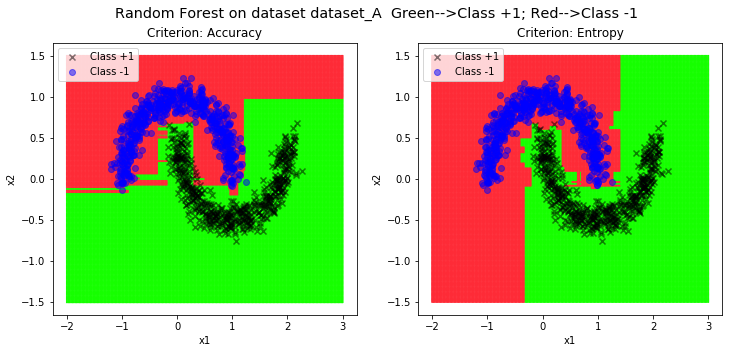

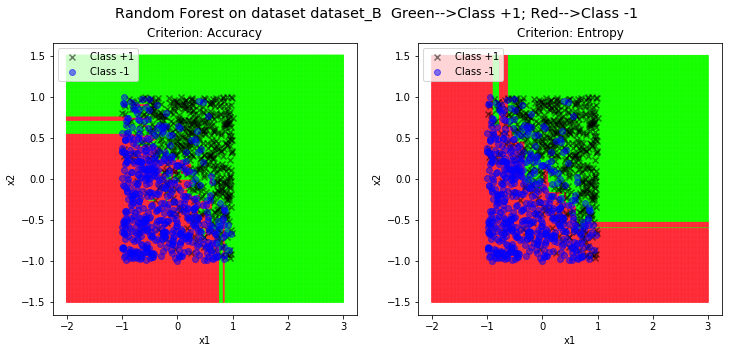

In [15]:
## Codewrite cell: Generate plots of learned Random Forests classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

from numpy import load
for det in range(2):
    if det == 0:
        data   = load('dataset_A.npz')
        dataset = 'dataset_A'
        alpha = 0
        
    if det == 1:
        data = load('dataset_B.npz')
        dataset = 'dataset_B'
        alpha = 1
        
    X_tr   = data['arr_0']
    Y_tr   = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
         
    '''Validation set of size one-third of the X_tr set
        Training set of size two-thirds of the X_tr set'''
    div = 4
    n_val = X_tr.shape[0]//div 
    d = X_tr.shape[1]
    
    X_val  = np.zeros((n_val,d))
    Y_val  = np.zeros((n_val,))
    X_train = np.zeros((X_tr.shape[0] - n_val,d)) 
    Y_train = np.zeros((X_tr.shape[0] - n_val,))
    j=0
    k=0
    
    '''putting every third element of X_tr in X_val and the rest in X_train
       and Same goes for the Y_val and Y_train'''
    for i in range(1,X_tr.shape[0]):
    
        if i%div == 0:
            X_val[j,:] = X_tr[i,:]    
            Y_val[j]   = Y_tr[i]     
            j = j + 1
        else:
            X_train[k,:]  = X_tr[i,:]
            Y_train[k]    = Y_tr[i]
            k = k +1    
    
  
    n = X_train.shape[0]
    nx1 = 200
    nx2 = 200
    x1list = np.linspace(-2,3, nx1)
    x2list = np.linspace(-1.5,1.5, nx2)
    X1,X2 = np.meshgrid(x1list, x2list) 
    X = np.concatenate((np.reshape(X1,(nx1*nx2,1)),np.reshape(X2,(nx1*nx2,1))),axis=1)
 
    Z1  = np.reshape(eval_random_forest(Forests[det+alpha],X),(nx1,nx2))
    Z2  = np.reshape(eval_random_forest(Forests[det+alpha+1],X),(nx1,nx2))
    
    Xp = X_train[Y_train == 1,:].T 
    Xn = X_train[Y_train ==-1,:].T

    fig1 =plt.figure(figsize = (12,5))
    st = fig1.suptitle('Random Forest on dataset '+str(dataset)+'  Green-->Class +1; Red-->Class -1',fontsize = 'x-large')

    ax1 = fig1.add_subplot(121)
    ax2 = fig1.add_subplot(122)
    

    ax1.scatter(X1,X2,Z1>0,'#16ff00')
    ax1.scatter(X1,X2,Z1<0,'#fe2b37')
    ax1.scatter(Xp[0,:],Xp[1,:],marker ="x", color='k',label ='Class +1',alpha=0.5)
    ax1.scatter(Xn[0,:],Xn[1,:],marker ="o", color='b',label = 'Class -1',alpha =0.5)
    ax1.title.set_text("Criterion: Accuracy")
    ax1.legend(loc ='upper left')
    
    ax2.scatter(X1,X2,Z2>0,'#16ff00')
    ax2.scatter(X1,X2,Z2<0,'#fe2b37')
    ax2.scatter(Xp[0,:],Xp[1,:],marker ="x", color='k',label ='Class +1',alpha=0.5)
    ax2.scatter(Xn[0,:],Xn[1,:],marker ="o", color='b',label = 'Class -1',alpha =0.5)
    ax2.title.set_text("Criterion: Entropy")
    ax2.legend(loc ='upper left')

    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    
